# ソルバーを使わずに連立常微分方程式を解く
ここでは多次元の常微分方程式を扱う．  
題材は有名なローレンツ方程式とする．  
<br>
<br>
<img src="https://latex.codecogs.com/svg.image?\begin{pmatrix}\dot{x}\\\dot{y}\\\dot{z}\end{pmatrix}&space;=&space;\begin{pmatrix}-px&plus;py\\-xz&plus;rx-y\\xy-bz\end{pmatrix}" title="\bg_white \dot{x}=ax">  
<br>

In [1]:
import matplotlib.pyplot as plt
import numpy as np

標準のリストで多次元配列の和を計算するのはかなり面倒です（実装してみるとわかる）．  
ex. 次の２つのベクトル$a$と$b$の和を計算する  
$$
a = \begin{bmatrix}
1\\
2\\
\end{bmatrix},~~~b = \begin{bmatrix}
3\\
4\\
\end{bmatrix}
$$

In [2]:
# 標準のリストを使う
a = [1, 2]
b = [3, 4]

ans = []
for i in range(2):
    ans.append(a[i] + b[i])

ans

[4, 6]

In [3]:
# numpyで実装
a = np.array([1, 2])
b = np.array([3, 4])

a + b

array([4, 6])

このようにnumpyを使うことで直感的な行列（ベクトル）演算が行なえます．  
多次元の場合，ベクトル和を一気に計算できるのでndarrayを使うのが楽です．  

## 微分方程式の定義

In [4]:
def loorenz(X, p, r, b):
    """ローレンツ方程式
    * Xは状態変数ベクトル（ndarray）
    * p, r, bはパラメータ
    """
    
    x, y, z = X  # アンパック．右辺のndarryから１つずつ値を取り出す．
    
    dx = -p*x + p*y
    dy = -x*z + r*x -y
    dz = x*y - b*z
    
    return np.array([dx, dy, dz])

ルンゲクッタ法で解いてみる．  

In [5]:
x = []  # 解xを格納する空のリスト
t = []  # 時刻tnを格納するリスト

dt = 0.01

# パラメータ
p = 10
r = 28
b = 8/3

# 初期値代入
x.append(np.array([0, 4, 28]))
t.append(0)


for i in range(5000):
    # 係数を計算
    k1 = loorenz(x[i], p, r, b)
    k2 = loorenz(x[i] + dt/2*k1, p, r, b)
    k3 = loorenz(x[i] + dt/2*k2, p, r, b)
    k4 = loorenz(x[i] + dt*k3, p, r, b)
    
    x_next = x[i] + dt/6*(k1 + 2*k2 + 2*k3 + k4)  # 解を更新
    
    # 解を格納
    x.append(x_next)
    t.append(t[i] + dt)

解`x`はndarrayのリストになっているので特定の行を取り出すのが大変です．  

In [6]:
x[:5]

[array([ 0,  4, 28]),
 array([ 0.37874472,  3.96113633, 27.27079661]),
 array([ 0.71798164,  3.92785062, 26.57466741]),
 array([ 1.02220782,  3.9042356 , 25.90911523]),
 array([ 1.29583319,  3.89341441, 25.27202581])]

データにアクセスしやすくするため，単一のndarrayに変換する．  

In [7]:
x = np.stack(x)

In [8]:
x

array([[ 0.        ,  4.        , 28.        ],
       [ 0.37874472,  3.96113633, 27.27079661],
       [ 0.71798164,  3.92785062, 26.57466741],
       ...,
       [ 9.12585895, -0.05854653, 36.47531608],
       [ 8.21723138, -0.74699631, 35.48024863],
       [ 7.33724976, -1.27972093, 34.46825676]])

0列目にxの時刻歴，1列目にyの時刻歴，2列目にzの時刻歴が入っている二次元ndarray`x`が作れた．  
解をプロットしてみる．  

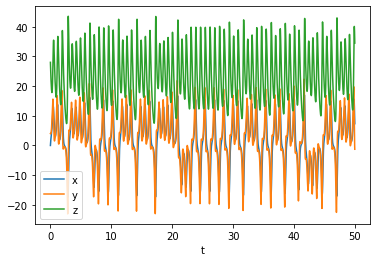

In [9]:
plt.plot(t, x[:, 0], label="x")
plt.plot(t, x[:, 1], label="y")
plt.plot(t, x[:, 2], label="z")
plt.xlabel("t")
plt.legend()

周期的な振動が起こっていることがわかる．  
3次元プロットしてみる．  

In [15]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(projection='3d')
ax.plot(x[:, 0], x[:, 1], x[:, 2])
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")

%matplotlib inline
plt.show()

ImportError: Failed to import any qt binding

有名なローレンツアトラクタの図が得られた．